# Lesson 2 Assignment: A new ARIMA model
Now that you have built an ARIMA model, build a new one with fresh data (try one of these datasets from Duke. Annotate your work in a notebook, visualize the data and your model, and test its accuracy using MAPE.

# ARIMA with Monthly Sunspot Data

we'll use the "Monthly Sunspot Numbers" dataset, which records the number of sunspots observed on the Sun each month from 1749 to 1983.



To begin, we import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

We can then load the data and look at the head

In [2]:
# Load the Monthly Sunspot Numbers dataset
data = pd.read_csv('monthly-sunspots.csv')

In [4]:
data.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


Then we convert the 'Month' column to a datetime format, and set it as the index.

In [3]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

Let's visualize the original data

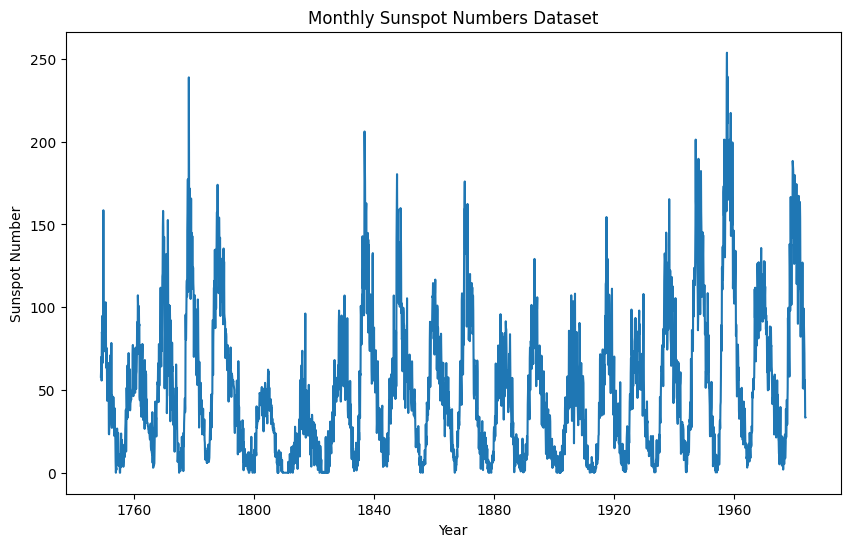

In [5]:
# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('Monthly Sunspot Numbers Dataset')
plt.show()

### Training the Model

First, we split the data into train and test sets. The training data includes all observations until January 1980, and the test data includes the observations from February 1980 onwards.

In [6]:
# Split the data into train and test sets
train_data = data[:'1980-01-01']
test_data = data['1980-02-01':]

Next, We then fit the ARIMA model to the training data using an order of (5, 1, 0). This order specifies the number of autoregressive (p), differencing (d), and moving average (q) terms for the ARIMA model. You can experiment with different values to find the best fit for your dataset.

In [7]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


After fitting the model, we make predictions for the test data using the predict method.

In [8]:
# Make predictions
predictions = model_fit.predict(start='1980-02-01', end='1983-12-01', dynamic=False)

We plot the training data, test data, and predicted values to visualize the performance of the ARIMA model.

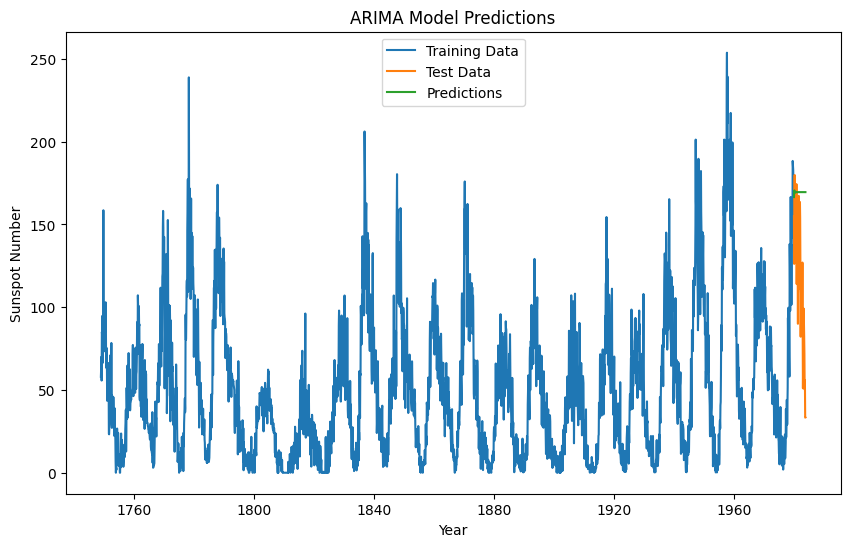

In [9]:
# Plot the predicted values along with the original data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

## Evaluating the Model Accuracy

To evaluate the accuracy of the ARIMA model, we can calculate various performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). These metrics provide insights into the model's prediction errors and the percentage deviation from the actual values.

We first we define a function called calculate_metrics that takes the actual values and predicted values as inputs and returns the calculated metrics. We use NumPy functions to perform the calculations:

In [10]:
import numpy as np

# Calculate performance metrics
def calculate_metrics(actual, predicted):
    mae = np.mean(np.abs(predicted - actual))
    mse = np.mean((predicted - actual) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((predicted - actual) / actual)) * 100
    return mae, mse, rmse, mape

Next, we convert the test data and predictions into NumPy arrays using the to_numpy() method. This allows us to perform element-wise calculations.

In [11]:
actual_values = test_data.to_numpy().flatten()
predicted_values = predictions.to_numpy()

Then, we call the calculate_metrics function with the actual and predicted values to obtain the MAE, MSE, RMSE, and MAPE.

In [12]:
# Calculate the performance metrics
mae, mse, rmse, mape = calculate_metrics(actual_values, predicted_values)

# Print the performance metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 51.532395672634685
Mean Squared Error (MSE): 4114.229043715861
Root Mean Squared Error (RMSE): 64.14225630359336
Mean Absolute Percentage Error (MAPE): 70.13092006742181


Oh! The the model is bad! To improve the model performance, we need to apply some data preprocessing, and tweak the model's parameters.